# Example 5: Sum up displacement
This example describes how to correlate faults extracted at different time steps.

## Setup

1. First, you will need sign in to your Google account. If you're not signed in, you can sign in [here](https://myaccount.google.com/?utm_source=sign_in_no_continue)
2. Next, head on to the [Colab Welcome Page](https://colab.research.google.com/notebooks/welcome.ipynb#recent=true).
3. There, select Github in the top tab and search for https://github.com/thilowrona/fault_analysis_toolbox/blob/master/examples/2-fault_properties/2-fault_properties.ipynb
4. Clicking opens this notebook. This is a Jupyter notebook; an awesome combination of code and documentation allowing us work on, describe and share our projects.
5. When you run the first cell, you will face a pop-up saying ‘Warning: This notebook was not authored by Google’; you should click on ‘Run Anyway’ to get rid of the warning.
6. Next we want to save our notebook. If you click on ‘File’ and then ‘Save’, you will see a pop-up saying ´CANNOT SAVE CHANGES´. Now, click on ‘SAVE A COPY IN DRIVE’. This opens up a new tab with the same file, but this time located in your Drive. If you want to continue working after saving, use the file in the new tab. Your notebook will be saved in a folder called Colab Notebooks in your Google Drive by default.

## Load packages
To run the toolbox, we will need a couple of packages including the toolbox itself. So let's install them:

In [1]:
!pip3 install git+https://github.com/thilowrona/fatbox.git

  Cloning https://github.com/thilowrona/fatbox.git to /tmp/pip-req-build-zf5yelue
  Running command git clone -q https://github.com/thilowrona/fatbox.git /tmp/pip-req-build-zf5yelue
     |████████████████████████████████| 163kB 7.1MB/s 
     |████████████████████████████████| 103.4MB 52kB/s 
  Cloning https://github.com/ulikoehler/cv_algorithms.git to /tmp/pip-install-nhaflghh/cv-algorithms
  Running command git clone -q https://github.com/ulikoehler/cv_algorithms.git /tmp/pip-install-nhaflghh/cv-algorithms
  Created wheel for fatbox: filename=fatbox-0.0.1-cp37-none-any.whl size=25848 sha256=766cd7a90ff6685c16007918454f51db3f8cc3ed0e46a46d23294145a68b5028
  Stored in directory: /tmp/pip-ephem-wheel-cache-c0q8c7qm/wheels/3c/75/06/4f57a6a85e140ffdf1280b29ebde7d5e62277dfc68e4aeb466
  Created wheel for network: filename=network-0.1-cp37-none-any.whl size=3157 sha256=69d7e86f93bb347c6b93369ae7c0fd1815a4f070dd58b19d26bde07d303fc060
  Stored in directory: /root/.cache/pip/wheels/f6/e7/6a/7098

In [2]:
!git clone https://github.com/thilowrona/fatbox_tutorials

Cloning into 'fatbox_tutorials'...
remote: Enumerating objects: 306, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 306 (delta 40), reused 0 (delta 0), pack-reused 171
Receiving objects: 100% (306/306), 30.66 MiB | 25.34 MiB/s, done.
Resolving deltas: 100% (111/111), done.


Now we can load the python packages:

In [3]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import Layout, interactive, widgets
from tqdm import tqdm

from fatbox.edits import closest_node, assign_displacement
from fatbox.plots import plot_attribute, plot_faults

## Load and plot faults

First, we load our fault networks extracted from a 2-D model over several timesteps:

In [4]:
Gs = []
for n in range(3,50):
  Gs.append(pickle.load(open('/content/fatbox_tutorials/5-displacement/graphs/g_'+ str(n) + '.p', 'rb')))

Now we can visualize these faults:

In [5]:
%matplotlib inline
from ipywidgets import interactive, widgets, Layout


def f(time):
    fig, ax = plt.subplots(figsize=(16,4))
    plot_attribute(Gs[time], 'slip', ax)
    plt.xlim([1000, 3500])
    plt.ylim([600, 0])
    plt.show()

interactive_plot = interactive(f, time=widgets.IntSlider(min=3, max=49, step=1, layout=Layout(width='900px')))
output = interactive_plot.children[-1]
output.layout.width = '1000px'
interactive_plot

interactive(children=(IntSlider(value=3, description='time', layout=Layout(width='900px'), max=49, min=3), Out…

## Sum up two time steps



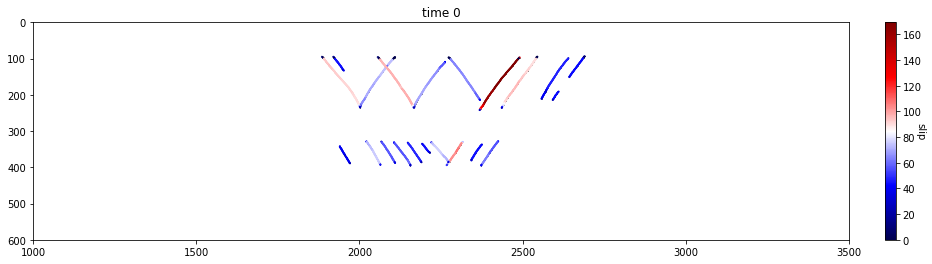

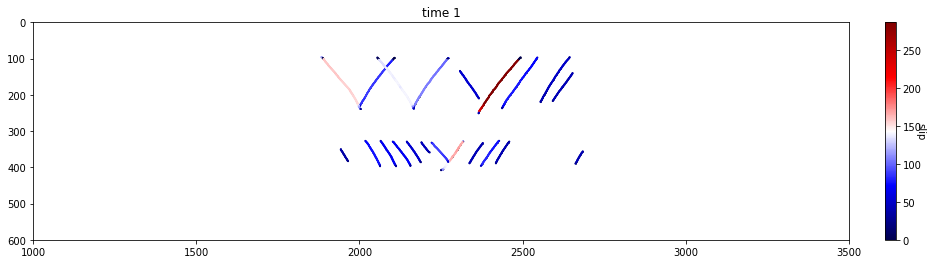

In [6]:
G_0 = Gs[0]
G_1 = Gs[1]

fig, ax = plt.subplots(figsize=(16,4))
plot_attribute(G_0, 'slip', ax)
plt.title('time 0')
plt.xlim([1000, 3500])
plt.ylim([600, 0])
plt.show()

fig, ax = plt.subplots(figsize=(16,4))
plt.title('time 1')
plot_attribute(G_1, 'slip', ax)
plt.xlim([1000, 3500])
plt.ylim([600, 0])
plt.show()


First we just copy over slip to displacement:

In [7]:
def write_slip_to_displacement(G, dim):    
    if dim == 2:
        for node in G:
            G.nodes[node]['heave'] = G.nodes[node]['slip_x']
            G.nodes[node]['throw'] = G.nodes[node]['slip_z']
            G.nodes[node]['displacement'] = G.nodes[node]['slip']

    if dim == 3:
        for node in G:
            G.nodes[node]['heave']   = G.nodes[node]['slip_x']            
            G.nodes[node]['lateral'] = G.nodes[node]['slip_y']
            G.nodes[node]['throw']   = G.nodes[node]['slip_z']
            G.nodes[node]['displacement'] = G.nodes[node]['slip']
    return G

G_0 = write_slip_to_displacement(G_0, dim=2)
G_1 = write_slip_to_displacement(G_1, dim=2)

print(G_0.nodes[10])

{'pos': (2538, 104), 'component': 0, 'polarity': 0, 'edges': 2, 'fault': 0, 'dx': -5, 'dy': 6, 'slip_rate_x': 0.0005521000000000002, 'slip_rate_z': 0.0007752429, 'slip_rate': 0.0009517436440556932, 'slip_x': 52.341479632698956, 'slip_z': 73.49639641504157, 'slip': 90.2294340896427, 'heave': 52.341479632698956, 'throw': 73.49639641504157, 'displacement': 90.2294340896427}


Now we find the faults common to both time steps:

In [8]:
def get_fault_labels(G):
    labels=set()
    for node in G:
        labels.add(G.nodes[node]['fault'])
    return sorted(list(labels))       

def common_faults(G, H):
    C_G = get_fault_labels(G)
    C_H = get_fault_labels(H)
    return list(set(C_G) & set(C_H))

cf = common_faults(G_0, G_1)
print(cf)

[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


Let's check:

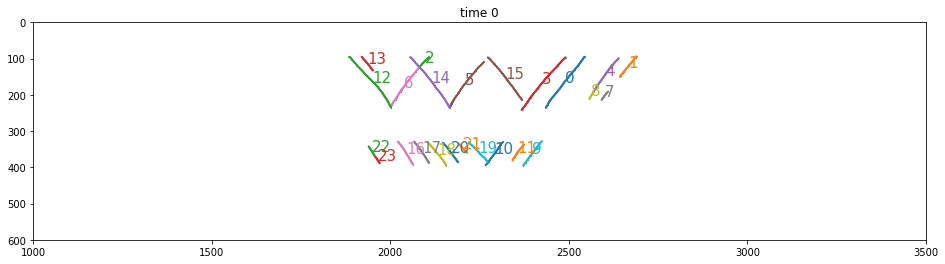

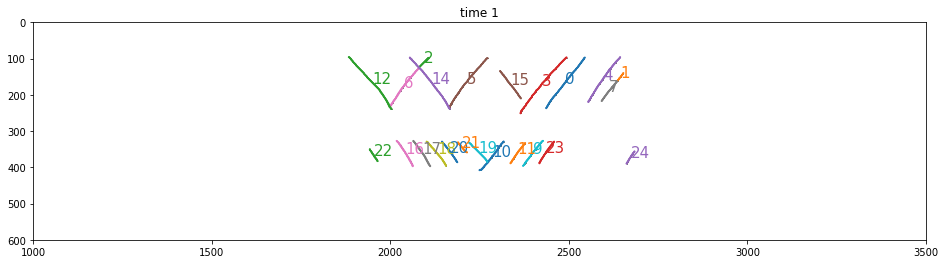

In [9]:
fig, ax = plt.subplots(figsize=(16,4))
plot_faults(G_0, ax, label=True)
plt.title('time 0')
plt.xlim([1000, 3500])
plt.ylim([600, 0])
plt.show()

fig, ax = plt.subplots(figsize=(16,4))
plt.title('time 1')
plot_faults(G_1, ax, label=True)
plt.xlim([1000, 3500])
plt.ylim([600, 0])
plt.show()

Looks good!

Now we need two more functions: one to get a fault and one to get the displacement with coordinates of the fault.

In [10]:
def get_fault(G, n):
    nodes = [node for node in G if G.nodes[node]['fault']==n]
    return G.subgraph(nodes)

def get_displacement(G, dim):  
    if dim == 2:
        points = np.zeros((len(list(G)),6))    
        for n, node in enumerate(G):
            points[n,0] = node
            points[n,1] = G.nodes[node]['pos'][0]
            points[n,2] = G.nodes[node]['pos'][1]
            points[n,3] = G.nodes[node]['heave']
            points[n,4] = G.nodes[node]['throw']
            points[n,5] = G.nodes[node]['displacement']
    if dim == 3:
        points = np.zeros((len(list(G)),7))    
        for n, node in enumerate(G):
            points[n,0] = node
            points[n,1] = G.nodes[node]['pos'][0]
            points[n,2] = G.nodes[node]['pos'][1]
            points[n,3] = G.nodes[node]['heave']
            points[n,4] = G.nodes[node]['lateral']
            points[n,5] = G.nodes[node]['throw']
            points[n,6] = G.nodes[node]['displacement']
    return points

Now let's:

1.   Go through the common faults
2.   Get their displacement with coordinates
3.   Find the closest points
4.   Add the displacement from time 0 to time 1

In [11]:
for fault in cf:
    
    points_0 = get_displacement(get_fault(G_0, fault), dim=2)
    points_1 = get_displacement(get_fault(G_1, fault), dim=2)

    for n in range(points_1.shape[0]):    
        index = closest_node(points_1[n,1:3], points_0[:,1:3]) 
        
        points_1[n,3] += points_0[index][3]
        points_1[n,4] += points_0[index][4]
        points_1[n,5] += points_0[index][5]
    
    G_1 = assign_displacement(G_1, points_1, dim=2)

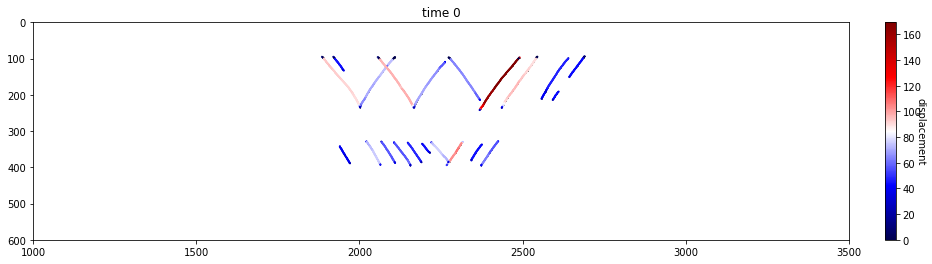

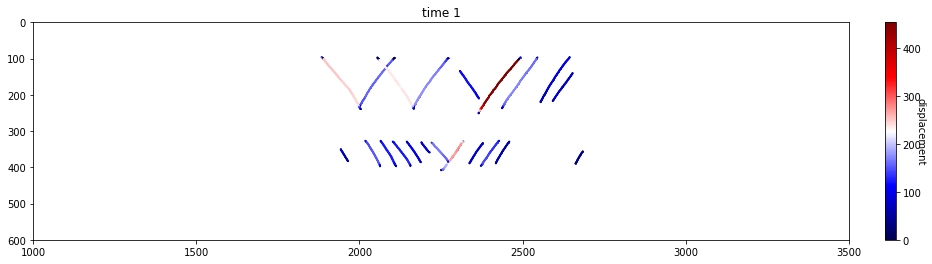

In [12]:
fig, ax = plt.subplots(figsize=(16,4))
plot_attribute(G_0, 'displacement', ax)
plt.title('time 0')
plt.xlim([1000, 3500])
plt.ylim([600, 0])
plt.show()

fig, ax = plt.subplots(figsize=(16,4))
plt.title('time 1')
plot_attribute(G_1, 'displacement', ax)
plt.xlim([1000, 3500])
plt.ylim([600, 0])
plt.show()

Okay, they still look similar... but the colorbar stretches much further, so the displacement at time 1 really includes the slip from time 0!

Now let's do this for all time steps:

In [13]:
max_comp = 0

for time in tqdm(range(len(Gs)-1)):

  G_0 = Gs[time]
  G_1 = Gs[time+1]

  if time == 0:
    G_0 = write_slip_to_displacement(G_0, dim=2)  
    Gs[time] = G_0
  
  G_1 = write_slip_to_displacement(G_1, dim=2)

  cf = common_faults(G_0, G_1)

  for fault in cf:
    
    points_0 = get_displacement(get_fault(G_0, fault), dim=2)
    points_1 = get_displacement(get_fault(G_1, fault), dim=2)

    for n in range(points_1.shape[0]):    
        index = closest_node(points_1[n,1:3], points_0[:,1:3]) 
        
        points_1[n,3] += points_0[index][3]
        points_1[n,4] += points_0[index][4]
        points_1[n,5] += points_0[index][5]
    
    G_1 = assign_displacement(G_1, points_1, dim=2)

  Gs[time+1] = G_1

100%|██████████| 46/46 [01:00<00:00,  1.32s/it]


In [14]:
%matplotlib inline
from ipywidgets import interactive, widgets, Layout


def f(time):
    fig, ax = plt.subplots(figsize=(16,4))
    plot_attribute(Gs[time], 'displacement', ax)
    plt.xlim([1000, 3500])
    plt.ylim([600, 0])
    plt.show()

interactive_plot = interactive(f, time=widgets.IntSlider(min=3, max=45, step=1, layout=Layout(width='900px')))
output = interactive_plot.children[-1]
output.layout.width = '1000px'
interactive_plot

interactive(children=(IntSlider(value=3, description='time', layout=Layout(width='900px'), max=45, min=3), Out…